In [342]:
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [343]:
folder='../datasets'
list_file = [
    {"name": "H10", "path": "/HLP_10.csv"},
    {"name": "H16", "path": "/HLP_16.csv"},
    {"name": "PL", "path": "/PEP_LIFE.csv"},
    {"name": "PP", "path": "/plifepred.csv"},
    {"name": "PC", "path": "/canon/peptipedia_canon.csv"},
    {"name": "NPC", "path": "/canon/no_peptipedia_canon.csv"},
    {"name": "NPNC", "path": "/no_canon/no_peptipedia_notcanon.csv"},
    {"name": "PNC", "path": "/no_canon/peptipedia_notcanon.csv"},
    #{"name": "LN", "path": "/LIST_NULL.csv"},
    #{"name": "LN2", "path": "/LIST_NULL_2.csv"}
    #{"name": "THP", "path": "/thpdb.csv"}
]

In [344]:
def get_path(name):
    for file in list_file:
        if file['name'] == name:
            return file['path']
    return None

In [345]:
df_2=pd.DataFrame()

Archivo H10 cargado con éxito.
Carpeta /HLP_10.csv
Tamaño: (189, 2)
Sumatoria de null:
 sequence             0
half_life_seconds    0
dtype: int64
Tamaño sin null: (189, 2)




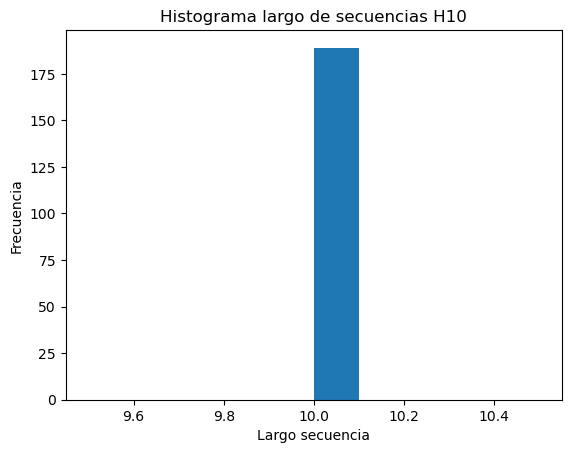

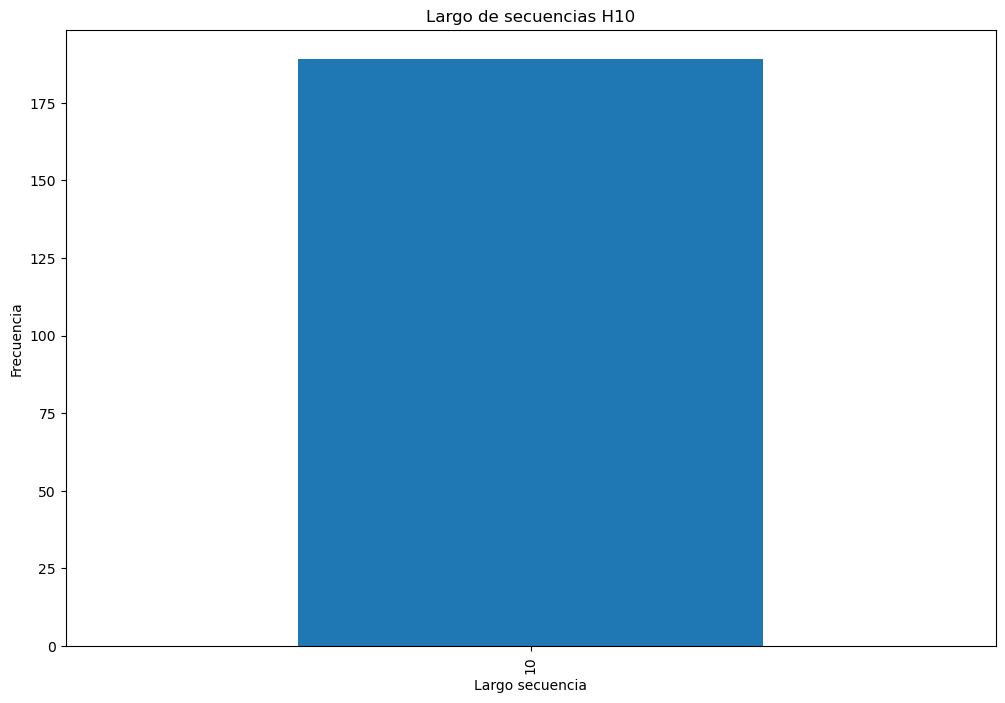

Archivo H16 cargado con éxito.
Carpeta /HLP_16.csv
Tamaño: (186, 2)
Sumatoria de null:
 sequence             0
half_life_seconds    0
dtype: int64
Tamaño sin null: (186, 2)




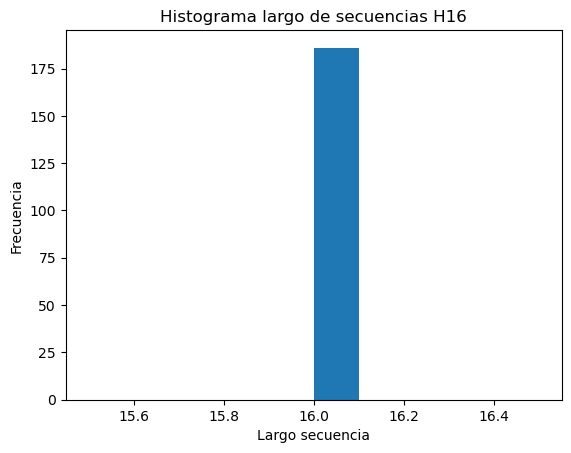

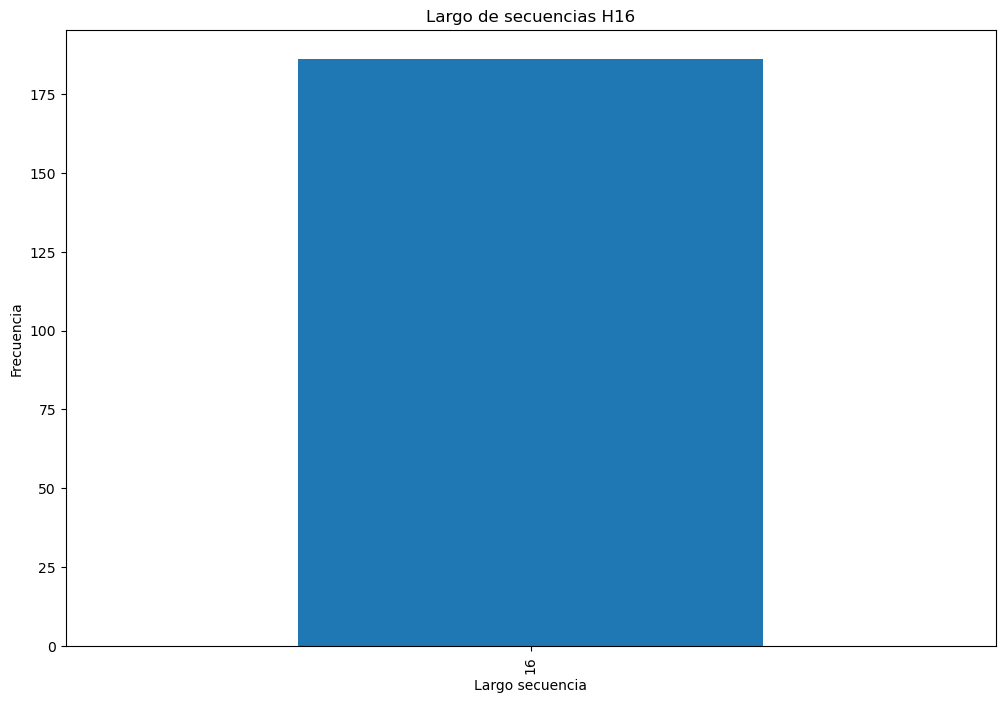

Archivo PL cargado con éxito.
Carpeta /PEP_LIFE.csv
Tamaño: (965, 2)
Sumatoria de null:
 sequence             0
half_life_seconds    0
dtype: int64
Tamaño sin null: (965, 2)




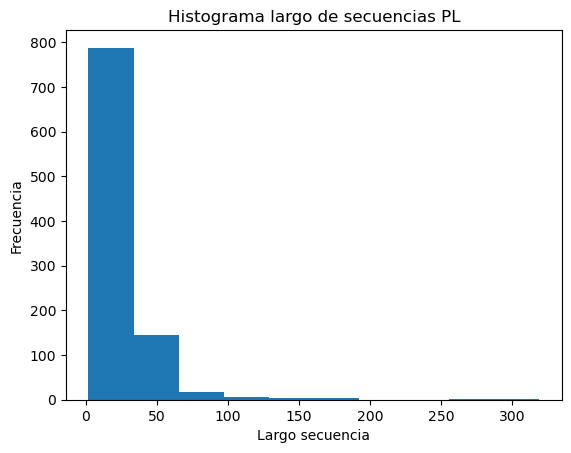

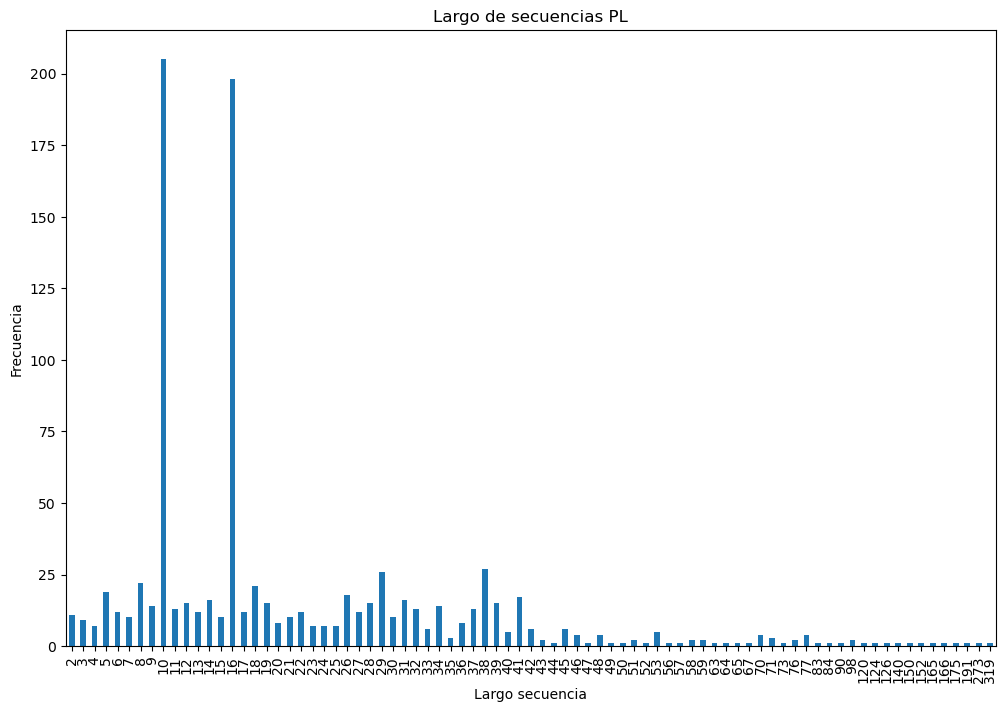

Archivo PP cargado con éxito.
Carpeta /plifepred.csv
Tamaño: (245, 2)
Sumatoria de null:
 sequence             0
half_life_seconds    0
dtype: int64
Tamaño sin null: (245, 2)




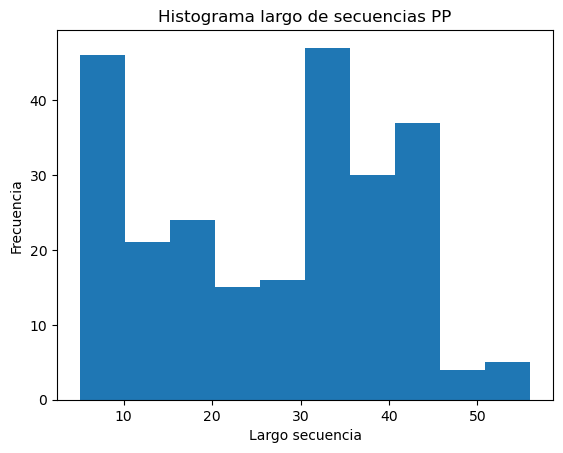

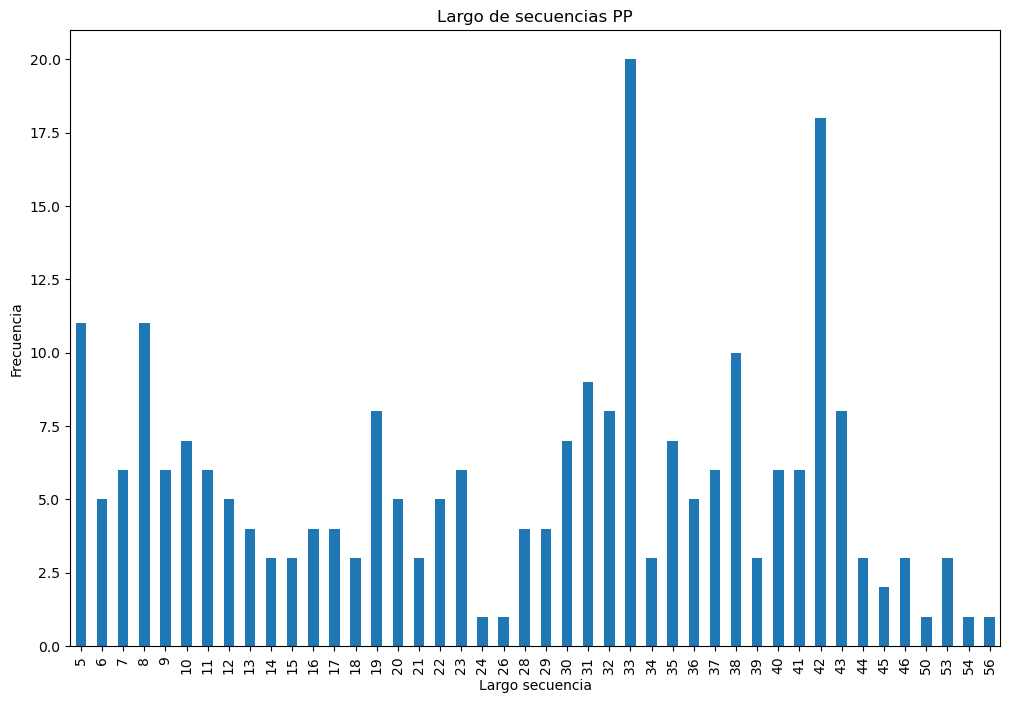

Archivo PC cargado con éxito.
Carpeta /canon/peptipedia_canon.csv
Tamaño: (183, 216)
Sumatoria de null:
 sequence                                                    0
half_life_seconds                                           0
in_peptipedia                                               0
Anti_HIV                                                    0
Therapeutic                                                 0
Anti_nematode                                               0
Anti_coronaviridae                                          0
Anti_feline_coronavirus                                     0
Enzyme_inhibitor                                            0
Anti_west_nile_virus                                        0
Anti_junin_virus                                            0
Anti_iridoviridae                                           0
Cosmetic_and_dermatology                                    0
Anti_mollicute                                              0
Anti_rhabdoviridae         

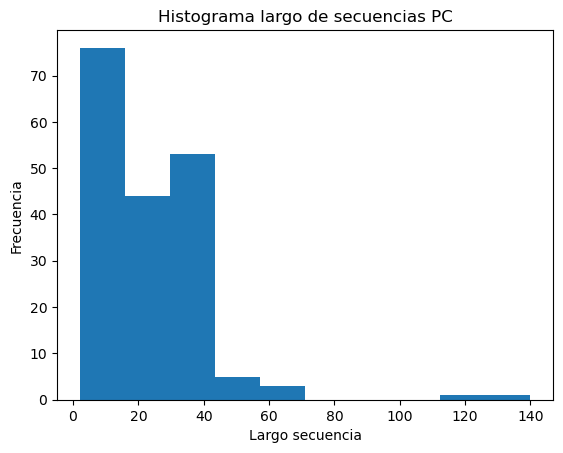

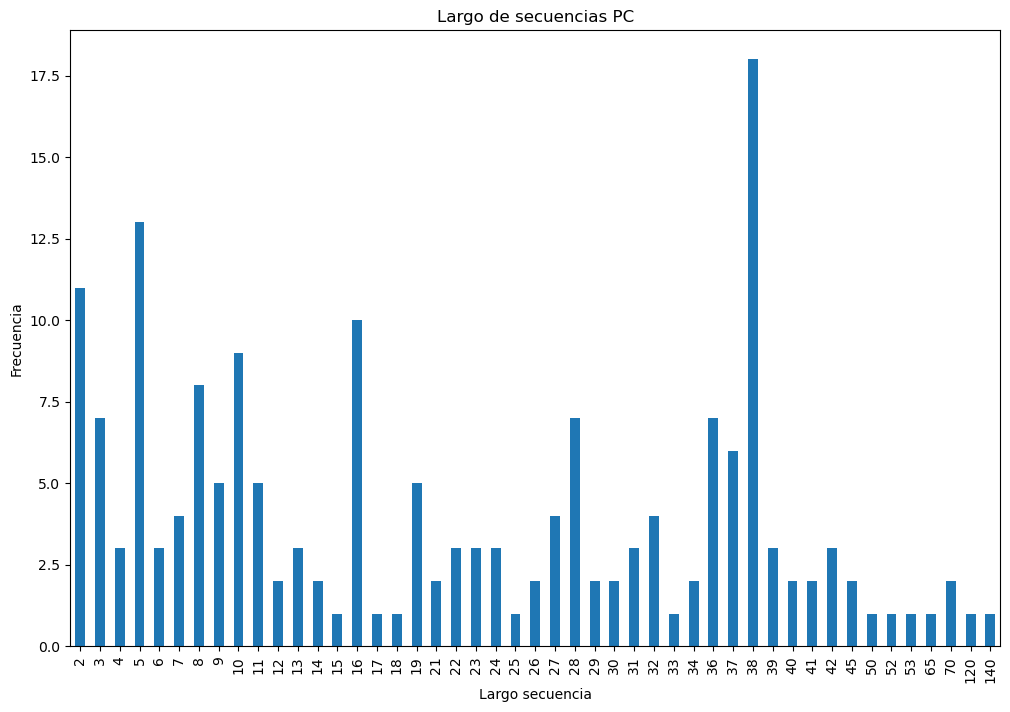

Archivo NPC cargado con éxito.
Carpeta /canon/no_peptipedia_canon.csv
Tamaño: (977, 3)
Sumatoria de null:
 sequence             0
half_life_seconds    0
in_peptipedia        0
dtype: int64
Tamaño sin null: (977, 3)




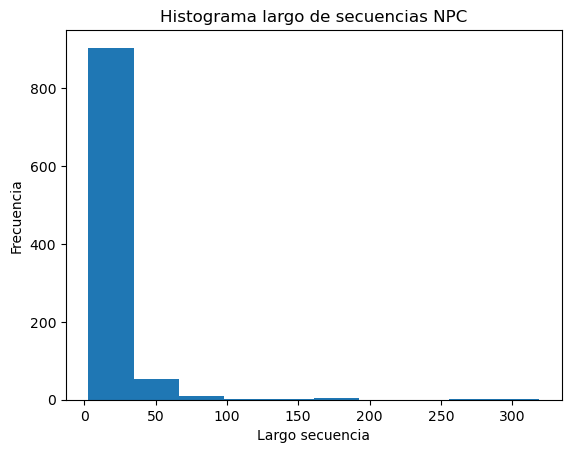

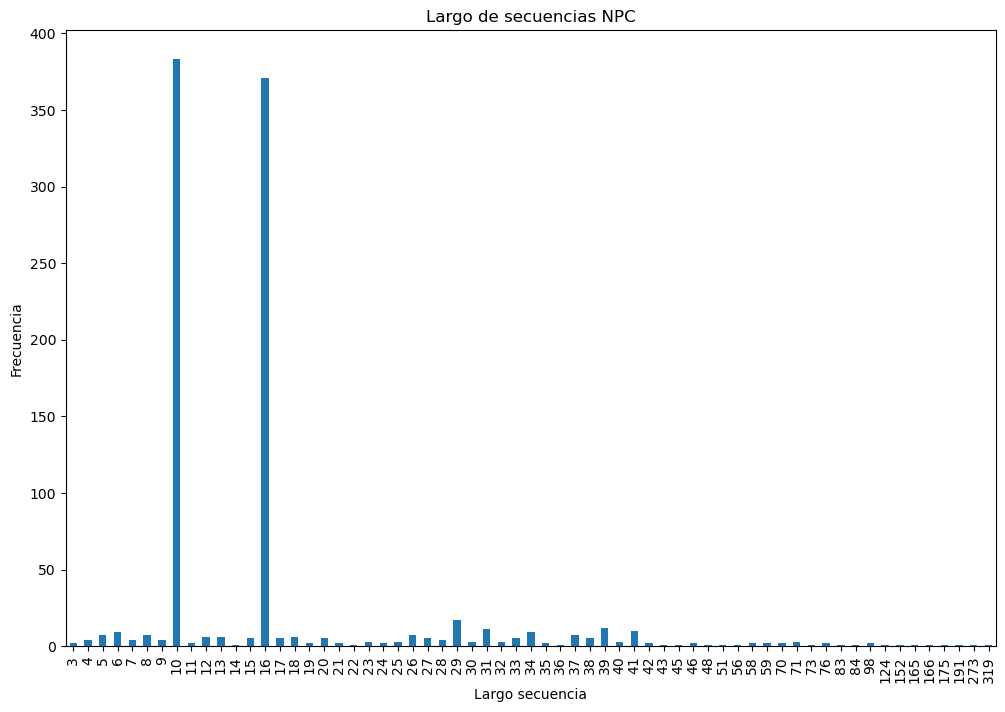

Archivo NPNC cargado con éxito.
Carpeta /no_canon/no_peptipedia_notcanon.csv
Tamaño: (352, 3)
Sumatoria de null:
 sequence             0
half_life_seconds    0
in_peptipedia        0
dtype: int64
Tamaño sin null: (352, 3)




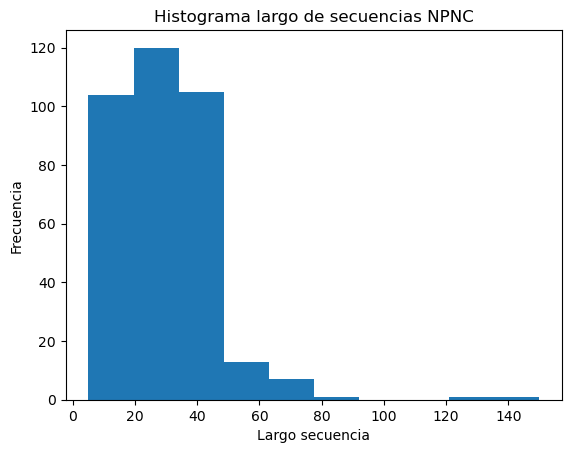

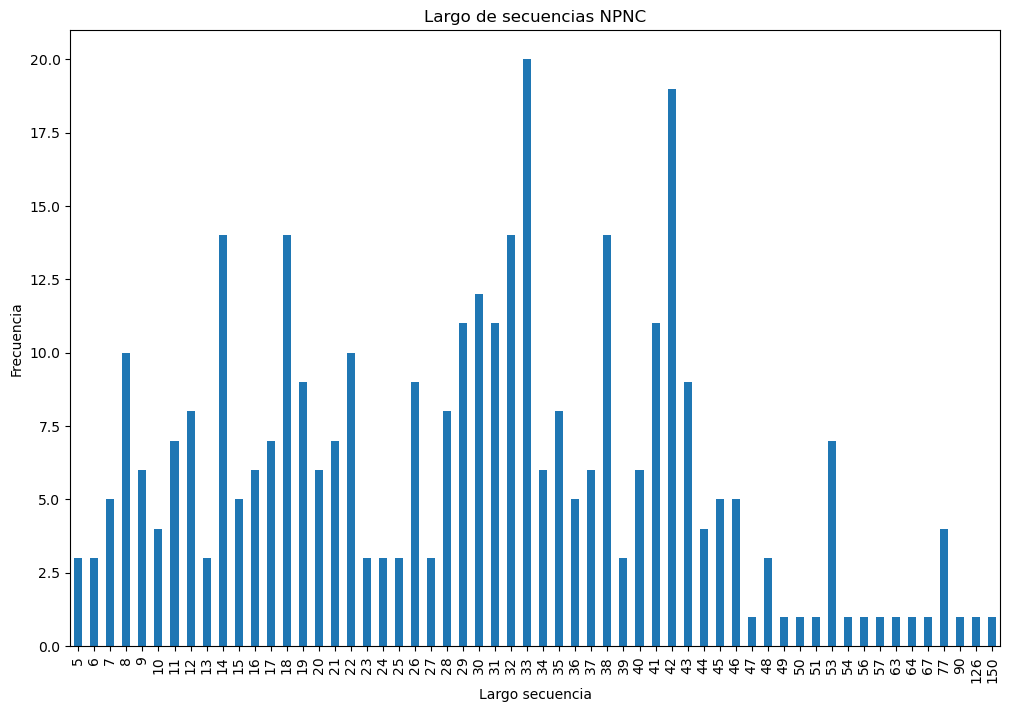

Archivo PNC cargado con éxito.
Carpeta /no_canon/peptipedia_notcanon.csv
Tamaño: (1, 216)
Sumatoria de null:
 sequence                                                    0
half_life_seconds                                           0
in_peptipedia                                               0
Anti_HIV                                                    0
Therapeutic                                                 0
Anti_nematode                                               0
Anti_coronaviridae                                          0
Anti_feline_coronavirus                                     0
Enzyme_inhibitor                                            0
Anti_west_nile_virus                                        0
Anti_junin_virus                                            0
Anti_iridoviridae                                           0
Cosmetic_and_dermatology                                    0
Anti_mollicute                                              0
Anti_rhabdoviridae    

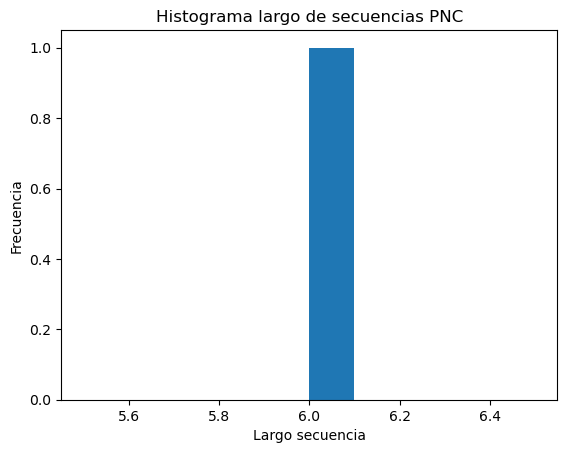

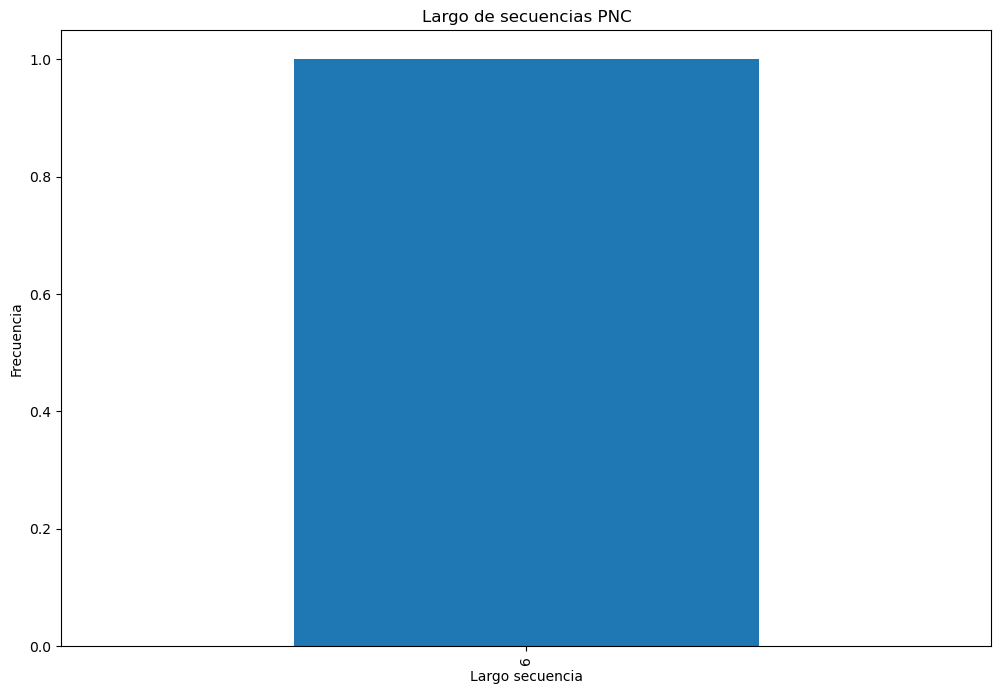

In [346]:
for file in list_file:
    path = get_path(file['name'])
    
    if path:
        df = pd.read_csv(folder + path)
        print(f"Archivo {file['name']} cargado con éxito.")
        print("Carpeta", path)
        print("Tamaño:", df.shape)
        print("Sumatoria de null:\n", df.isnull().sum())
        print("Tamaño sin null:", df.dropna().shape)
        print("\n") 
        df['length'] = df['sequence'].str.len()
        if file['name'] == "PC" or file['name'] == "PNC":
            df_2=df.drop(columns=['sequence', 'length', 'half_life_seconds','in_peptipedia']).sum()
            df_2 = df_2.reset_index()
            df_2.columns = ['Column', 'Sum']
            df_2 = df_2[df_2['Sum'] != 0]
            #display(df_2.sort_values(by='Sum', ascending=False).reset_index(drop=True))
        df['length'].plot(kind='hist', bins=10)
        plt.title(f"Histograma largo de secuencias {file['name']}")
        plt.xlabel("Largo secuencia")
        plt.ylabel("Frecuencia")
        plt.show()

        plt.figure(figsize=(12, 8))
        df['sequence'].str.len().value_counts().sort_index().plot(kind='bar')
        plt.title(f"Largo de secuencias {file['name']}")
        plt.xlabel("Largo secuencia")
        plt.ylabel("Frecuencia")
        plt.show()
    else:
        print(f"No se encontró la ruta para {file['name']}.")